In [107]:
# This notebook plays with the MNIST digits dataset, for which I use the
# parser https://pypi.org/project/python-mnist/
# and the official data source http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from mnist import MNIST
mndata = MNIST('/Users/wltrimbl/git/python-mnist/data')
images, labels = mndata.load_training()
testX, testY = mndata.load_testing()

# MNIST.load_testing() puts the data in some weird data type... 
# convert everything to familiar numpy...
images = np.array(images)
labels = np.array(labels) 
testX = np.array(testX)
testY= np.array(testY)

In [108]:
images.shape, labels.shape, testX.shape, testY.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [109]:
digits = labels

In [110]:
digits[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [111]:
digits = np.array(images)

In [112]:
digits.shape

(60000, 784)

In [113]:
p = np.reshape(digits, newshape=( 60000, 28,28))

In [114]:
p.shape

(60000, 28, 28)

Label: 9


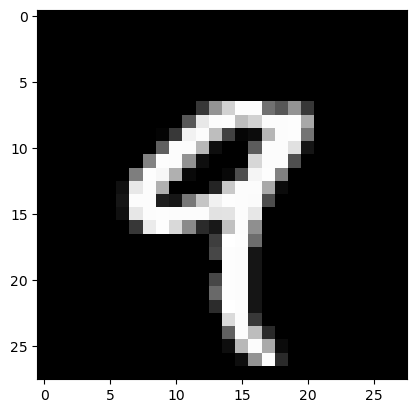

In [115]:
plt.imshow(p[4,::], cmap="gray")
print("Label:", labels[4])

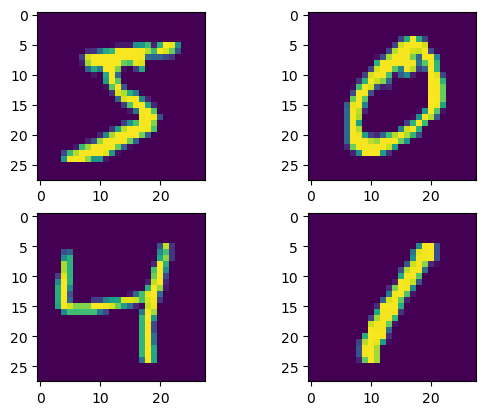

In [116]:
# Here are the first four images in the (training) dataset:
plt.subplot(221)
plt.imshow(p[0,::])
plt.subplot(222)
plt.imshow(p[1,::])
plt.subplot(223)
plt.imshow(p[2,::])
plt.subplot(224)
plt.imshow(p[3,::])
plt.savefig("MNIST.png", dpi=300, bbox_inches="tight")

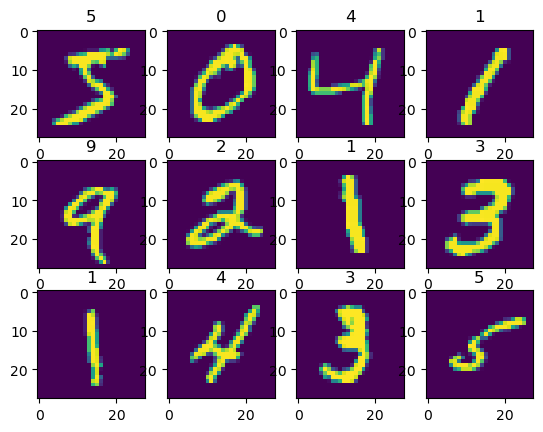

In [119]:
# Here are the first 12:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(p[i,::])
    plt.title(labels[i])

In [120]:
sample = digits[0:1000,:]

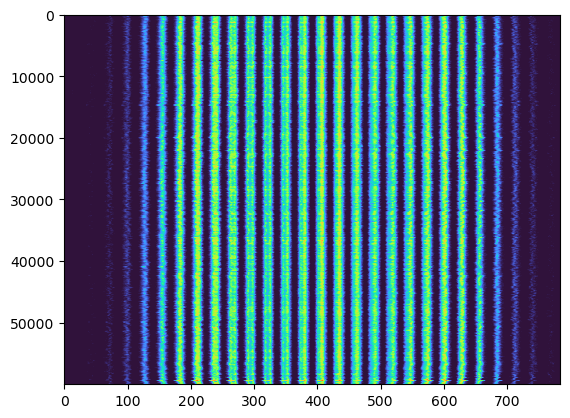

In [121]:
# The image of all the pixels flattened out is jumbled -- it is a mixture of the digits.
plt.imshow(digits, aspect="auto", cmap="turbo")

In [122]:
# I can sort by the labels, and show them grouped by digit.
digitsordered = digits[np.argsort(labels),:]
digits.shape

(60000, 784)

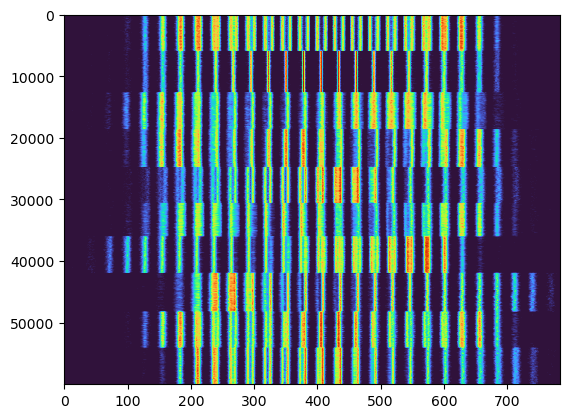

In [123]:
plt.imshow(digitsordered, aspect="auto", cmap="turbo")

In [ ]:
# So this is pretty cool; about a tenth of the data is digit 0, 1, ... 9 
# and the contrast between digit 0 and digit 1 is high.


Text(50.722222222222214, 0.5, 'samples')

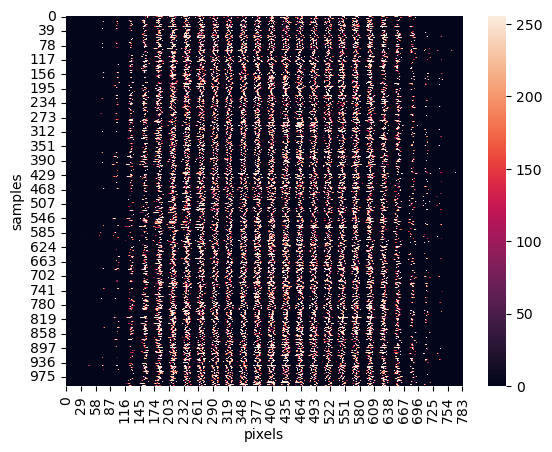

In [124]:
import seaborn as sb
sb.heatmap(sample)
plt.xlabel("pixels")
plt.ylabel("samples")

/Users/Shared/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(307.81186868686865, 0.5, 'samples')

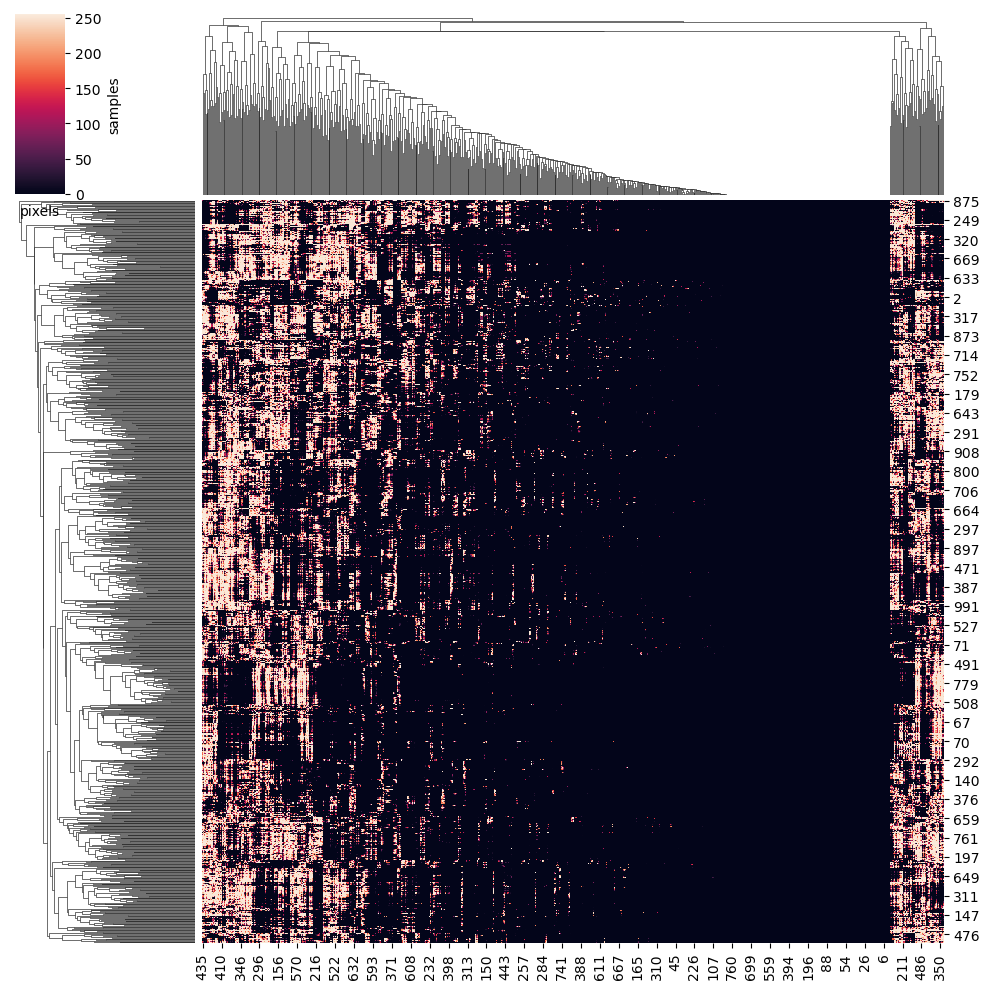

In [125]:
# Wait, this isn't quite what I want.  I want to reorder columns (pixel positions) and rows (sample digits).
sb.clustermap(sample)
plt.xlabel("pixels")
plt.ylabel("samples")


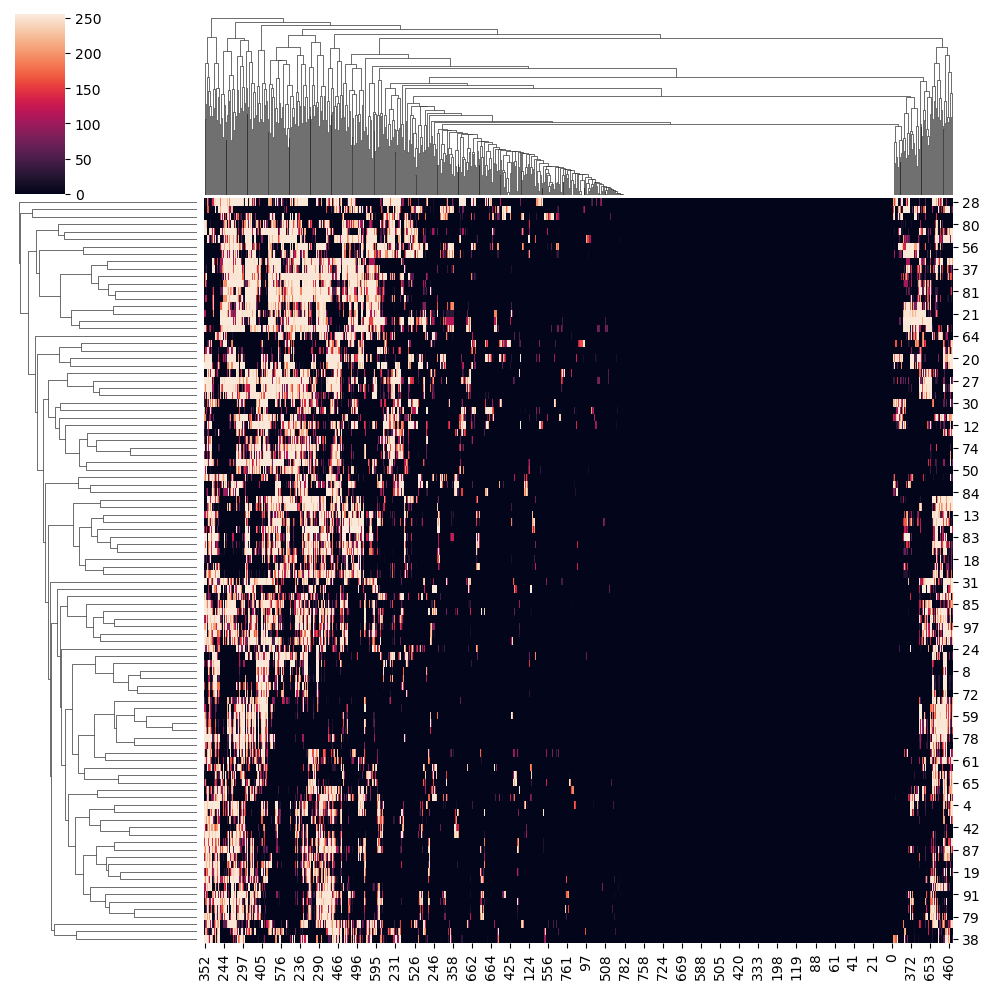

In [126]:
# A little busy, maybe only look at 100 samples?
sb.clustermap(sample[0:100,:])

In [128]:
sb.clustermap(sample[0:100,:], row_colors=labels[0:100])

TypeError: 'numpy.uint8' object is not iterable

<Figure size 1000x1000 with 0 Axes>

In [129]:
# sb.clustermap wants a list of color names for row_colors.  Fine. 
# Construct a list of colors using the electronics / resistor color code
# that maps digits to high-contrast, named-in-English colors:

h = {0: "black", 1:"brown", 2:"red", 3:"orange", 4:"yellow",
    5:"green", 6:"blue", 7:"purple", 8:"grey", 9:"white"}
colorlabels100 = []
for l in labels[0:100]:
    colorlabels100.append(h[l])
colorlabels100
colorlabels1k = [h[i] for i in labels[0:1000]]
colorlabels= [h[i] for i in labels]

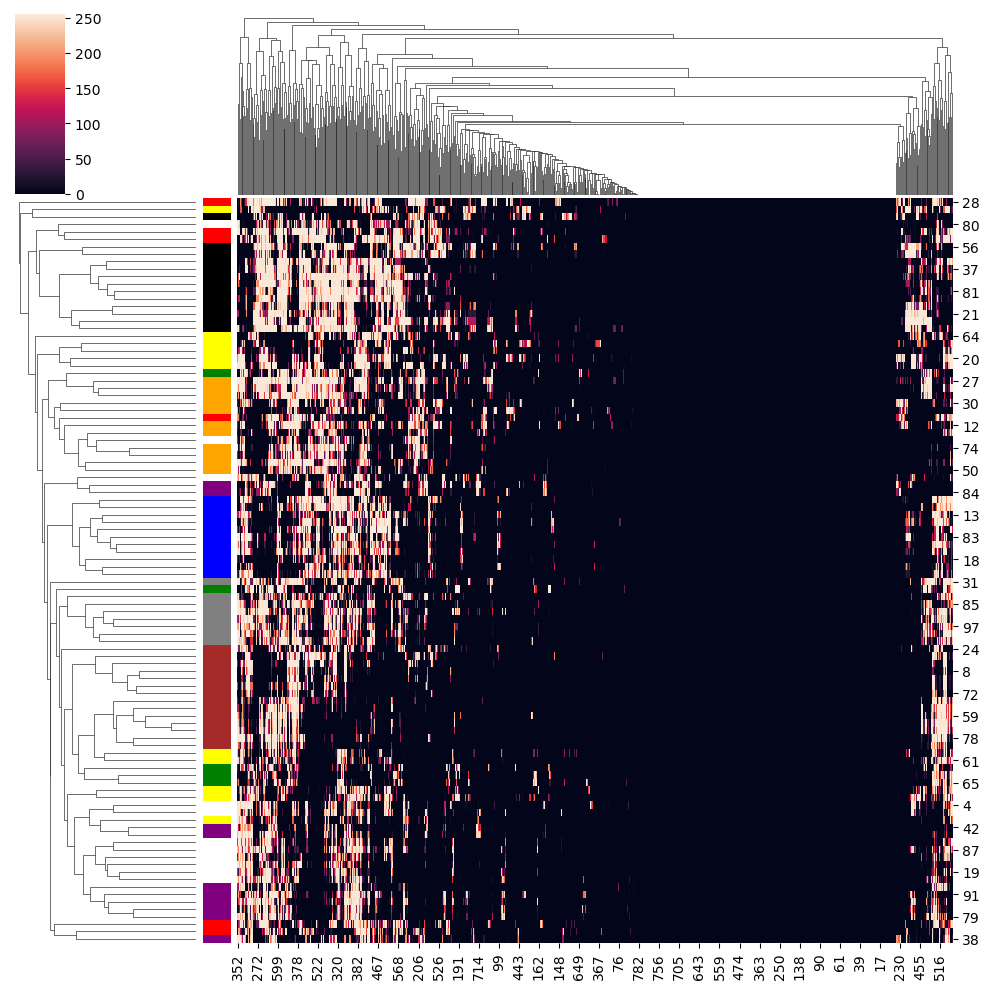

In [130]:
clustermap = sb.clustermap(sample[0:100,:], row_colors=colorlabels100)

In [131]:
# The clustermap library function gives me the data in attributes of the return value:
dir(clustermap)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_figure',
 '_get_palette',
 '_legend_out',
 '_margin_titles',
 '_preprocess_colors',
 '_update_legend_data',
 'add_legend',
 'apply',
 'ax_cbar',
 'ax_col_colors',
 'ax_col_dendrogram',
 'ax_heatmap',
 'ax_row_colors',
 'ax_row_dendrogram',
 'cax',
 'cbar_pos',
 'col_color_labels',
 'col_colors',
 'color_list_to_matrix_and_cmap',
 'data',
 'data2d',
 'dendrogram_col',
 'dendrogram_row',
 'dim_ratios',
 'fig',
 'figure',
 'format_data',
 'gs',
 'legend',
 'mask',
 'pipe',
 'plot',
 'plot_colors',
 'plot_dendrograms',
 'plot_matrix',
 'row_color_labels',
 'row_colors',
 'savefig',
 'set',
 'standard_scale',
 'tick_params',

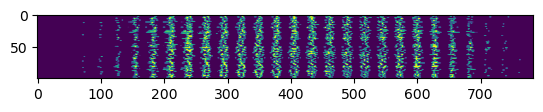

In [132]:
# There is data, which is what I gave it, 
plt.imshow(clustermap.data)

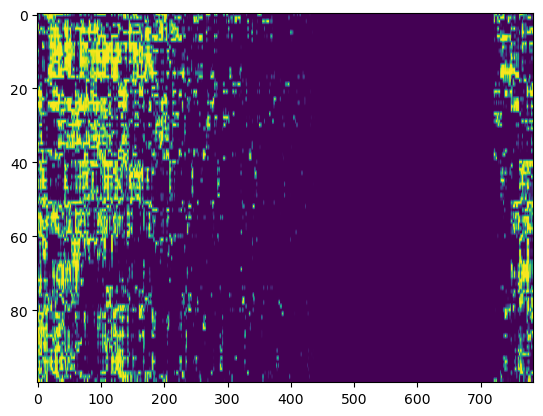

In [133]:
# And data2d, which has been reordered
plt.imshow(clustermap.data2d, aspect="auto")

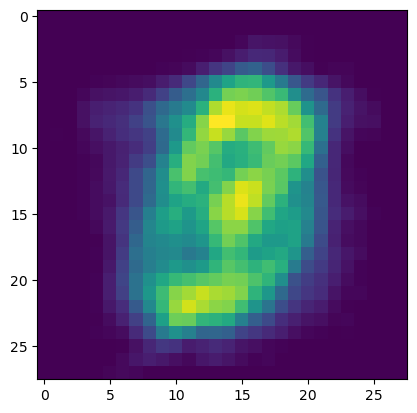

In [134]:
# I can plot what all the digits look like on top of each other
plt.imshow(np.array(clustermap.data.sum(axis=0)).reshape( (28,28)))

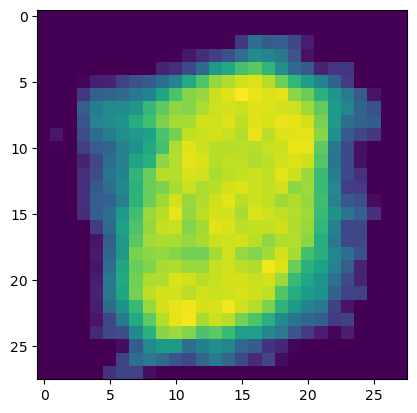

In [135]:
plt.imshow(np.array(clustermap.data.std(axis=0)).reshape( (28,28)))

In [136]:
# And it turns out the indexes for the row- and column- reordering are buried in ax_col_dendrogram:
dir(clustermap.ax_col_dendrogram)

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_fully_clipped_to_axes',
 '_

In [137]:
# To get the reordering of the rows and columns,
# https://github.com/mwaskom/seaborn/issues/1207
# I need clustermap.dendrogram_row.reordered_ind
clustermap.dendrogram_row.reordered_ind [ 0:20]

[28, 60, 68, 80, 25, 82, 56, 88, 34, 37, 69, 75, 81, 95, 1, 21, 51, 63, 64, 2]

In [138]:
clustermap.dendrogram_col.reordered_ind[0:10]

[352, 325, 353, 436, 435, 407, 380, 408, 547, 574]

In [139]:
digits.shape

(60000, 784)

In [140]:
# So let's get some pieces of this clustergram and plot them on a 28x28 pixel grid:
middlepixels = clustermap.dendrogram_col.reordered_ind[300:600]
endpixels = clustermap.dendrogram_col.reordered_ind[723:]

In [141]:
middle_image = np.zeros((28,28))
end_image = np.zeros((28,28))

In [142]:
middle_image.reshape((784,))[middlepixels] = 1
end_image.reshape((784,))[endpixels] = 1

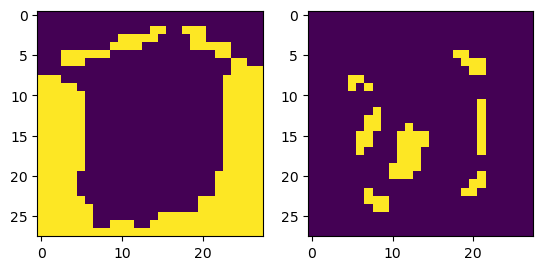

In [143]:
# These are the pixels that were clustered
plt.subplot(121)
plt.imshow(middle_image)
plt.subplot(122)
plt.imshow(end_image)

In [144]:
# Asking clustermap to compare my rows and columns...
# Let us try PCA, linear-algebra-only dimension reduction approach.

from sklearn.decomposition import PCA
pca=PCA(n_components=30)
pca.fit(sample.T)

PCA(n_components=30)

In [145]:
pca.components_.shape

(30, 1000)

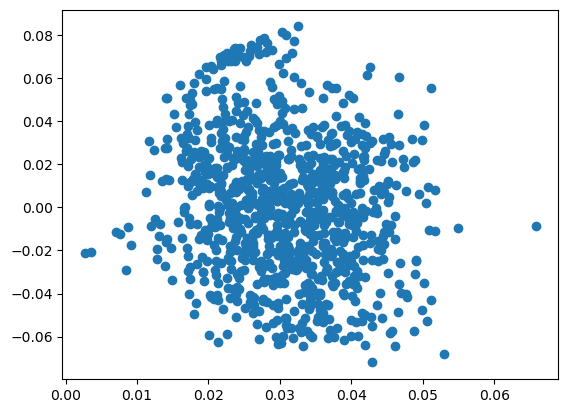

In [146]:
plt.scatter(pca.components_[0,:], pca.components_[1,:])

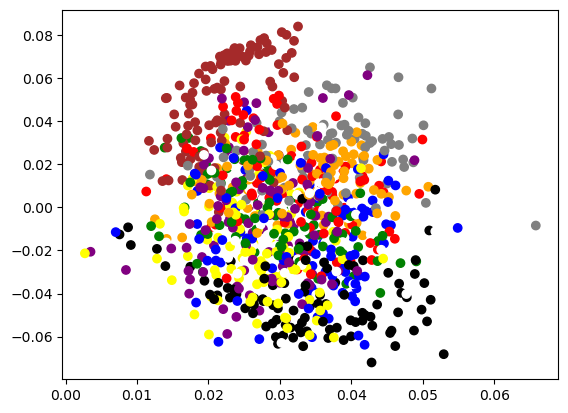

In [147]:
plt.scatter(pca.components_[0,0:1000], pca.components_[1,0:1000], color=colorlabels1k)

In [148]:
# This is a sample of 1000 points. 
h = {0: "black", 1:"brown", 2:"red", 3:"orange", 4:"yellow",
    5:"green", 6:"blue", 7:"purple", 8:"grey", 9:"white"}
colorlabels1k = []
for l in labels[0:1000]:
    colorlabels1k.append(h[l])
colorlabels1k[0:50]

colorlabelsall = []
for l in labels:
    colorlabelsall.append(h[l])
colorlabelsall[0:50]

['green',
 'black',
 'yellow',
 'brown',
 'white',
 'red',
 'brown',
 'orange',
 'brown',
 'yellow',
 'orange',
 'green',
 'orange',
 'blue',
 'brown',
 'purple',
 'red',
 'grey',
 'blue',
 'white',
 'yellow',
 'black',
 'white',
 'brown',
 'brown',
 'red',
 'yellow',
 'orange',
 'red',
 'purple',
 'orange',
 'grey',
 'blue',
 'white',
 'black',
 'green',
 'blue',
 'black',
 'purple',
 'blue',
 'brown',
 'grey',
 'purple',
 'white',
 'orange',
 'white',
 'grey',
 'green',
 'white',
 'orange']

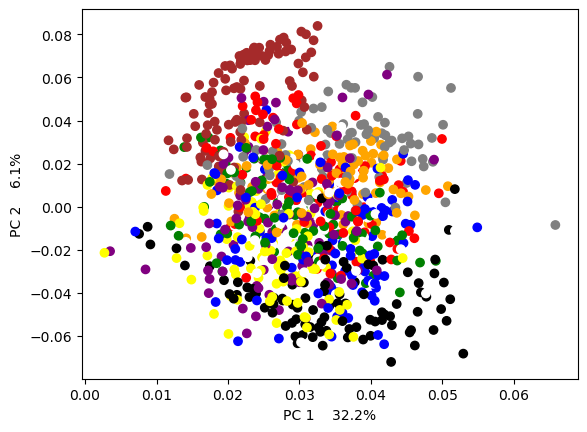

In [149]:
plt.scatter(pca.components_[0,:], pca.components_[1,:], color=colorlabels1k)
plt.xlabel("PC 1    "+"{:.1f}".format(pca.explained_variance_ratio_[0] * 100) + "%"); 
plt.ylabel("PC 2    "+"{:.1f}".format(pca.explained_variance_ratio_[1] * 100) + "%"); 

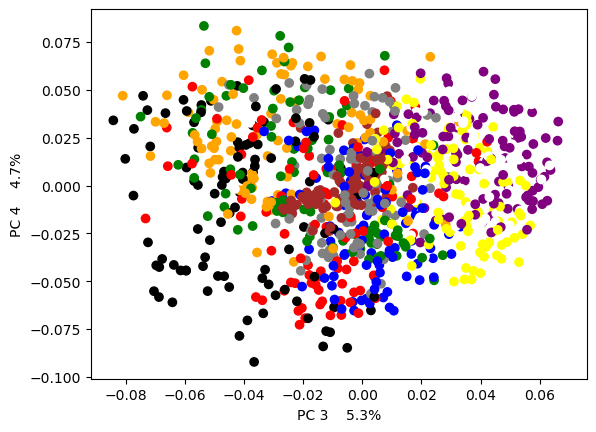

In [150]:
plt.scatter(pca.components_[2,:], pca.components_[3,:], color=colorlabels1k)
plt.xlabel("PC 3    "+"{:.1f}".format(pca.explained_variance_ratio_[2] * 100) + "%"); 
plt.ylabel("PC 4    "+"{:.1f}".format(pca.explained_variance_ratio_[3] * 100) + "%"); 

In [151]:
pca.singular_values_.shape, pca.components_[3].shape

((30,), (1000,))

In [152]:
r = np.dot(sample.T, sample)
r.shape

(784, 784)

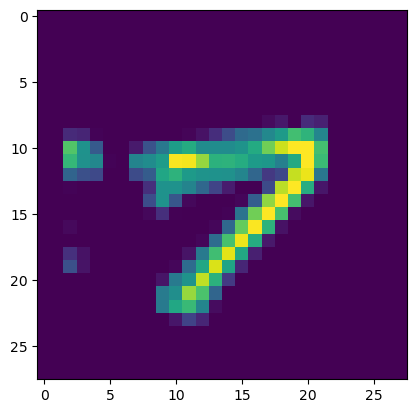

In [153]:
plt.imshow(r.reshape((28,28,-1))[:,:,310])

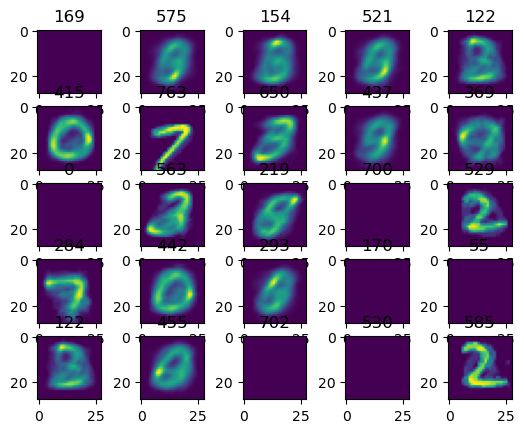

In [154]:
# I can plot the PCA components... which are sets of linear coefficients
# in the 784-dimension vector space of X... as images whose inner product
# with X gives the PCA coordinates: 
plt.subplot(551)
for i in range(25):
    j  = int(np.random.random()*780)
    plt.subplot(5,5,i+1)
    plt.title(j)
    plt.imshow(r.reshape((28,28,-1))[:,:,j])
    

In [ ]:
# Sample x sample transpose... generates an outer-product-like 
# array of products of all possible pairs. 

samplesample=np.dot(sample, sample.T)


In [ ]:
clustermap = sb.clustermap(samplesample[0:100,:], row_colors=colorlabels100)

In [ ]:
# A little disappointing, 1000 digits fed into PCA and plotted. 
# Let us try TSNE on this 1000 sample by 30-dimensional PCA

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate=.1, init='random').fit(pca.components_.T)

In [ ]:
X_embedded

In [ ]:
dir(X_embedded)

In [ ]:
X_embedded.embedding_.shape

In [ ]:
# We want to plot embedding_[:,1] against embedding_[:,0] 
plt.scatter(X_embedded.embedding_[:,0], X_embedded.embedding_[:,1])

In [ ]:
# And add label colors
plt.scatter(X_embedded.embedding_[:,0], X_embedded.embedding_[:,1], color=colorlabels1k)

In [ ]:
# This is a little more satisfying than [blind] PCA, but 
# less than perfect.  

In [ ]:
# Fit 50-component PCA on all the data
pca50=PCA(n_components=50)
pca50.fit(digits.T)

In [ ]:
plt.scatter(pca50.components_[0,:], pca50.components_[1,:], color=colorlabelsall)
plt.xlabel("PC 1    "+"{:.1f}".format(pca50.explained_variance_ratio_[0] * 100) + "%"); 
plt.ylabel("PC 2    "+"{:.1f}".format(pca50.explained_variance_ratio_[1] * 100) + "%"); 

In [ ]:
pca50.components_.shape

In [ ]:
# Fit TSNE on subset of the big PCA output, but since TSNE takes too long for 10^{4} points, use only 
# 1000 samples
TSNE1K = TSNE(n_components=2, learning_rate=.1, init='random').fit(pca50.components_[:,0:1000].T)

In [ ]:
plt.scatter(TSNE1K.embedding_[:,0], TSNE1K.embedding_[:,1], color=colorlabelsall[0:1000])

In [ ]:
TSNE4K = TSNE(n_components=2, learning_rate=.1, init='random').fit(pca50.components_[:,0:4000].T)

In [ ]:
plt.scatter(TSNE4K.embedding_[:,0], TSNE4K.embedding_[:,1], color=colorlabelsall[0:4000])

In [ ]:
# Wait, this is qualitatively different from TSNE with n=1k 

# We can see that the TSNE procedure for drawing pretty 2d pictures that 
# reflect concentrations of point density in high dimensional spaces
# is sensitive to number of points and tuning parameters; 
# and be warned, it is not deterministic, so you don't get the
# same clouds each time you run it.  But it sure is pretty.

In [ ]:
TSNE10K = TSNE(n_components=2, learning_rate=1.5, init="random").fit(pca50.components_[:,0:10000].T)

In [ ]:
plt.scatter(TSNE10K.embedding_[:,0], TSNE10K.embedding_[:,1], color=colorlabelsall[0:10000])

In [155]:
from sklearn.svm import SVC


In [156]:
svc = SVC()




In [157]:
sampleX = digits[0:1000,:]
sampleY = labels[0:1000]


In [158]:
svc.fit(sampleX, sampleY)

SVC()

In [159]:
predY = svc.predict(testX)

In [160]:
from sklearn.metrics import confusion_matrix
confusion_svm = confusion_matrix(predY, testY)
confusion_svm

array([[ 955,    0,   11,    4,    1,    9,   15,    0,   13,   12],
       [   0, 1113,    2,    1,    1,    5,    3,   16,    3,    6],
       [   1,    4,  936,   32,    3,    8,   20,   18,   13,    5],
       [   0,    1,    7,  836,    0,   11,    0,    6,   14,    9],
       [   5,    0,   20,    0,  896,   13,   18,   11,   17,   46],
       [  10,    3,    2,   92,    1,  808,   23,    0,   39,    7],
       [   6,    2,   15,    1,   13,   12,  875,    0,    9,    0],
       [   2,    1,   15,   16,    4,    8,    0,  942,   13,   27],
       [   1,   11,   23,   24,    1,    8,    4,    1,  828,    3],
       [   0,    0,    1,    4,   62,   10,    0,   34,   25,  894]])

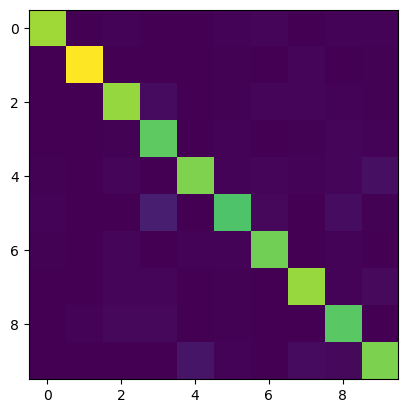

In [161]:
plt.imshow(confusion_svm)

In [162]:
svc = SVC(C=10)
svc.fit(sampleX, sampleY)
predY = svc.predict(testX)
confusion_svm10 = confusion_matrix(predY, testY)


In [ ]:
plt.imshow(confusion_svm10)

In [163]:
confusion_svm10

array([[ 959,    0,   11,    2,    1,    9,   10,    0,   12,    9],
       [   0, 1110,    2,    0,    1,    7,    3,   16,    1,    5],
       [   3,    2,  961,   26,    3,    8,   15,   20,   11,    5],
       [   0,    1,    5,  851,    0,   16,    0,    8,   14,    8],
       [   4,    0,   11,    0,  896,    8,   10,    8,   13,   29],
       [   5,    2,    2,   76,    0,  808,   18,    1,   41,    9],
       [   5,    3,   11,    3,   11,   11,  901,    0,    9,    0],
       [   2,    3,   13,   15,    1,    7,    0,  935,   14,   25],
       [   2,   13,   15,   30,    1,    9,    1,    4,  839,    4],
       [   0,    1,    1,    7,   68,    9,    0,   36,   20,  915]])

In [164]:
# This (C=10)  looks like it is a little better on the test set than C=1 (default)
# Let us try all the regularization parameters!!!
regparamtersweep = np.exp( np.log(10) * np.arange(-1, 4.01, .5)) 
regparamtersweep

array([1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04])

In [165]:
from sklearn.metrics import accuracy_score
accuracies = []

for reg in regparamtersweep:
    print(reg)
    fit = SVC(C=reg).fit(sampleX, sampleY)
    acc = accuracy_score(fit.predict(testX), testY) 
    accuracies.append(acc)


0.09999999999999998
0.3162277660168379
1.0
3.1622776601683795
10.000000000000002
31.622776601683803
100.00000000000004
316.22776601683825
1000.0000000000007
3162.2776601683804
10000.00000000001


[0.7846,
 0.8754,
 0.9083,
 0.9179,
 0.9175,
 0.9175,
 0.9175,
 0.9175,
 0.9175,
 0.9175,
 0.9175]

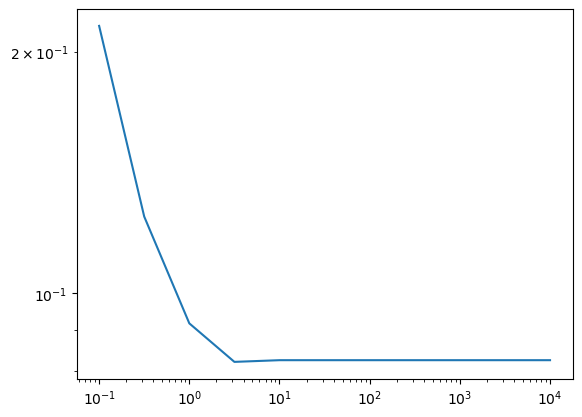

In [168]:
plt.loglog(regparamtersweep, 1-np.array(accuracies))

accuracies
